In [1]:
import matplotlib as mtl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
mtl.rcParams['figure.figsize'] = (12, 4)

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./data/BankCustomers.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [6]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [7]:
# discrete features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
discrete_features


['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

In [8]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['Surname', 'Geography', 'Gender']

In [9]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


### **EDA**

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### **1. Observation:** People of germany are more likely to leave the company.

<AxesSubplot:xlabel='Geography'>

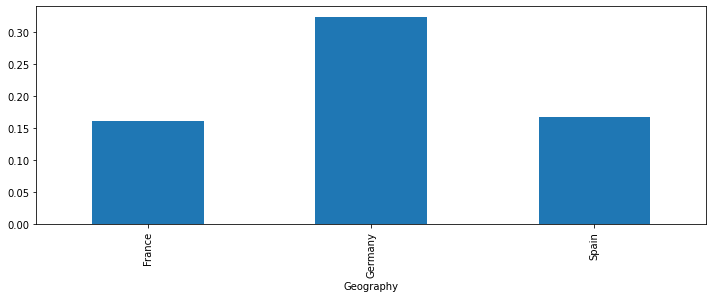

In [11]:
df.groupby(['Geography'])['Exited'].mean().plot.bar()

### **2. Observation:** Female are more likely to leave

<AxesSubplot:xlabel='Gender'>

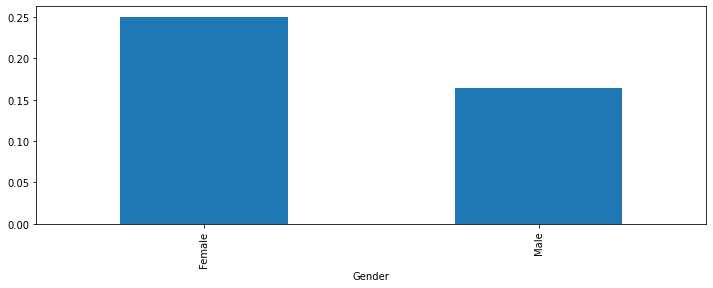

In [12]:
df.groupby(['Gender'])['Exited'].mean().plot.bar()

f:\dataScienceAi\githubRepo\playground\.venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Geography', ylabel='Exited'>

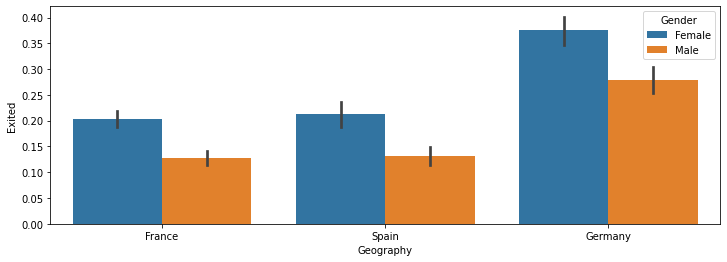

In [13]:
sns.barplot('Geography', 'Exited', data=df, hue='Gender')

In [14]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [15]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [16]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


### **Categorical Encoding**

In [17]:
geography_encode = LabelEncoder()
gender_encode = LabelEncoder()

In [18]:
df['Geography'] = geography_encode.fit_transform(df['Geography'])
df['Gender'] = gender_encode.fit_transform(df['Gender'])

In [19]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


In [83]:
df.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [20]:
X = df.drop(['Exited'], axis=1)
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57


In [21]:
y = df['Exited']
y.head(3)

0    1
1    0
2    1
Name: Exited, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [29]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (6700, 10)
X_test: (3300, 10)
y_train (6700,)
y_test: (3300,)


In [70]:
df_norm = pd.DataFrame(X_train, columns=df.drop(['Exited'], axis=1).columns)
df_norm.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.681053,0.306591,-1.095988,-0.946079,-0.004426,0.473978,-0.911583,-1.547768,-1.030670,1.528261
1,0.315279,0.306591,0.912419,-0.183251,1.032908,-0.052994,0.807737,0.646092,0.970243,-1.300657
2,-0.088246,0.306591,0.912419,0.960993,-0.350204,0.708442,-0.911583,0.646092,-1.030670,-1.309740


In [79]:
y_train.head(3)

8371    1
5027    0
9234    1
Name: Exited, dtype: int64

In [86]:
X[:1]

array([[-0.32622142, -0.90188624, -1.09598752,  0.29351742, -1.04175968,
        -1.22584767, -0.91158349,  0.64609167,  0.97024255,  0.02188649]])

### **Model Building**

In [165]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.5, max_depth=1, random_state=0)

clf.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.5, max_depth=1, random_state=0)

In [166]:
clf.score(X_test, y_test)

0.8645454545454545

In [158]:
y_true = y_test
y_true[:3]

6252    0
4684    0
1731    0
Name: Exited, dtype: int64

In [159]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

## **Performance Metrics**

In this problem recall  is important as **True Negative(Type 2 error)** is important here.

In [161]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2657
           1       0.74      0.47      0.58       643

    accuracy                           0.86      3300
   macro avg       0.81      0.72      0.75      3300
weighted avg       0.85      0.86      0.85      3300



Confusion matrix, without normalization
[[2548  109]
 [ 338  305]]
Normalized confusion matrix
[[0.95897629 0.04102371]
 [0.52566096 0.47433904]]


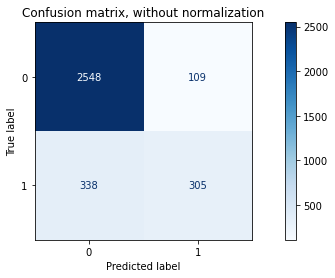

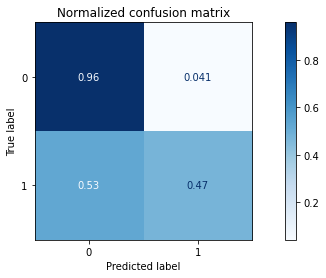

In [162]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()